***Tugas 2 II4035 Sistem Cerdas***
---

Nama	: Gyan Maiziko

NIM	: 18221008

Proses analisis harus meliputi:

* Penentuan jumlah cluster yang optimal menggunakan metode Elbow.
* Visualisasi hasil clustering untuk memahami distribusi data.
* Analisis karakteristik tiap cluster yang terbentuk.

Kemudian, jawablah pertanyaan berikut menggunakan dataset tersebut:

* Berapa jumlah cluster yang ideal berdasarkan metode Elbow yang Anda lakukan?
* Apa karakteristik utama dari setiap cluster yang teridentifikasi? (Misalnya, segmentasi pelanggan berdasarkan frekuensi pembelian, jumlah belanja, dll.)
* Bagaimana distribusi geografis dari cluster-cluster tersebut? Apakah ada pola geografis tertentu?

> #### Langkah - Langkah yang akan dijalakan untuk mempersiapkan data 
1. Mendeskripsikan Data 
    * A. Pembacaan Data
    * B. Describing Data
    * C. Mengetahui Variabel atau Attribute Type
2. Memverifikasi Kualitas Data
    * A. Identifikasi nilai yang Hilang (jika ada)
    * B. Identifikasi kesalahan penentuan tipe data ( jika ada )
    * C. Identifikasi Noise atau data Inconsisten
    * D. Identifikasi Pencilan atau Outliers 
    * E. Identifikasi data tidak berimbang 
3. Melakukan Eksplorasi Data 
    * Menggunakan Query data, Visualisasi, dan Statistik 

Pada tugas kali ini saya juga melakukan Feature Transformation pada Date yang nantinya digunakan untuk memperoleh insight 

***Data Preparation***
---
Tujuan : Melakukan pembacaan data dan mengetahui bentuk data

In [1]:
# Melakukan Pembcaan data menggunakan library Pandas 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

> ### A. Pembacaan Data

In [2]:
# Pembacaan data untuk mengetahui bentuk dan isi data
df = pd.read_csv('Tugas3_18221008_Clustering.csv');

# Melihat 5 data pertama dari dataset 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


> ### B. Describing Data

In [3]:
df.shape

(9800, 18)

In [4]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [5]:
df.head().T

,0,1,2,3,4
Row ID,1,2,3,4,5
Order ID,CA-2017-152156,CA-2017-152156,CA-2017-138688,US-2016-108966,US-2016-108966
Order Date,08/11/2017,08/11/2017,12/06/2017,11/10/2016,11/10/2016
Ship Date,11/11/2017,11/11/2017,16/06/2017,18/10/2016,18/10/2016
Ship Mode,Second Class,Second Class,Second Class,Standard Class,Standard Class
Customer ID,CG-12520,CG-12520,DV-13045,SO-20335,SO-20335
Customer Name,Claire Gute,Claire Gute,Darrin Van Huff,Sean O'Donnell,Sean O'Donnell
Segment,Consumer,Consumer,Corporate,Consumer,Consumer
Country,United States,United States,United States,United States,United States
City,Henderson,Henderson,Los Angeles,Fort Lauderdale,Fort Lauderdale


In [6]:
df['Category'].describe().to_frame()

,Category
count,9800
unique,3
top,Office Supplies
freq,5909


In [7]:
df['Category'].value_counts().to_frame()

,count
Category,
Office Supplies,5909
Furniture,2078
Technology,1813


> ### C. Mengetahui Variabel atau Attribute data

In [8]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

## ***Verification Data***

> ### Identifikasi nilai yang hilang

In [9]:
# Mencari tahu apakah ada data null atau missing pada 
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [10]:
# Menampilkan Detail rows yang Postal Codenya NaN
df[df['Postal Code'].isnull()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [11]:
df_cop = df.copy()
df_cop = df_cop.fillna('?')

In [12]:
# Identifikasi data hilang 
for i in range(len(df_cop.columns)):
    print('Attribute-',i,': ',df_cop.columns[i],', Number of ?: ', df_cop[df_cop[df_cop.columns[i]] == '?'].shape[0])

Attribute- 0 :  Row ID , Number of ?:  0
Attribute- 1 :  Order ID , Number of ?:  0
Attribute- 2 :  Order Date , Number of ?:  0
Attribute- 3 :  Ship Date , Number of ?:  0
Attribute- 4 :  Ship Mode , Number of ?:  0
Attribute- 5 :  Customer ID , Number of ?:  0
Attribute- 6 :  Customer Name , Number of ?:  0
Attribute- 7 :  Segment , Number of ?:  0
Attribute- 8 :  Country , Number of ?:  0
Attribute- 9 :  City , Number of ?:  0
Attribute- 10 :  State , Number of ?:  0
Attribute- 11 :  Postal Code , Number of ?:  11
Attribute- 12 :  Region , Number of ?:  0
Attribute- 13 :  Product ID , Number of ?:  0
Attribute- 14 :  Category , Number of ?:  0
Attribute- 15 :  Sub-Category , Number of ?:  0
Attribute- 16 :  Product Name , Number of ?:  0
Attribute- 17 :  Sales , Number of ?:  0


In [13]:
df[df['Postal Code'].isnull()]
# Detail rows yang Postal Codenya NaN

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [14]:
temp = df["Postal Code"].isnull()
temp2 = temp.values
count = 0
for i in range(len(temp2)):
    if (temp2[i] == True):
        count += 1
print("Total rows yang kosong pada kolom Postal Code ada sebanyak ", count, "dari total rows sebanyak",len(temp2),"rows")

Total rows yang kosong pada kolom Postal Code ada sebanyak  11 dari total rows sebanyak 9800 rows


> ### Identifikasi Pencilan atau Outliers pada setiap atribut yang berpotensi memiliki outliers

In [15]:
for i in range(len(df.columns)):
    if (df[df.columns[i]].dtypes in ["int64","float64"]):
        print('\nAttribute-',i,':',df[df.columns[i]].dtypes)
        Q1 = df[df.columns[i]].quantile(0.25)
        print('Q1',Q1)
        Q3 = df[df.columns[i]].quantile(0.75)
        print('Q3',Q3)
        IQR = Q3-Q1
        print('IQR',IQR)
        min=df[df.columns[i]].min()
        max=df[df.columns[i]].max()
        min_IQR=Q1-1.5*IQR
        max_IQR=Q3+1.5*IQR
        if (min<min_IQR):
            print(min)
            print('Low outlier is found')
        if (max>max_IQR):
            print(max)
            print('High outlier is found')


Attribute- 0 : int64
Q1 2450.75
Q3 7350.25
IQR 4899.5

Attribute- 11 : float64
Q1 23223.0
Q3 90008.0
IQR 66785.0

Attribute- 17 : float64
Q1 17.248
Q3 210.60500000000002
IQR 193.35700000000003
22638.48
High outlier is found


In [16]:
import matplotlib.pyplot as plt 

outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(df['Sales'])
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [3083.43, 8159.952, 3347.37, 3059.982, 2519.958, 3991.98, 4355.168, 2396.2656, 2735.952, 6354.95, 2999.95, 7999.98, 3059.982, 2715.93, 2309.65, 4899.93, 2244.48, 3610.848, 2453.43, 3040.0, 3149.93, 2807.84, 4663.736, 2575.944, 3999.95, 2396.4, 4548.81, 8187.65, 2665.62, 11199.968, 2399.6, 22638.48, 2690.97, 2549.985, 2799.96, 2934.33, 3359.952, 4164.05, 2504.74, 2395.2, 2430.08, 2799.96, 2591.56, 3080.0, 9449.95, 2624.985, 10499.97, 4799.984, 9099.93, 4367.896, 2879.952, 2404.704, 2249.91, 2321.9, 2799.96, 3504.9, 3930.072, 2275.5, 2314.116, 2479.96, 2999.95, 2348.82, 2799.944, 4912.59, 4228.704, 2357.488, 2548.56, 4158.912, 2888.127, 2254.41, 2279.96, 2793.528, 5199.96, 8399.976, 5443.96, 2152.776, 4007.84, 4164.05, 6999.96, 3266.376, 17499.95, 2887.056, 2567.84, 2399.96, 2399.96, 4416.174, 2541.98, 2573.82, 2249.91, 2625.12, 3499.93, 5399.91, 3812.97, 4499.985, 4535.976, 3404.5, 2518.29, 3357.6, 2973.32, 13999.96, 4643.8, 2803.92, 2563.056, 2939.93, 21

> #### Pada percobaan menemukan outliers pada data yang memiliki tipe integer atau float diperoleh hasil bahwa atribut ke 17 atau atribut Sales memiliki high outliers 

> #### Penanganan Missing Value atau data hilang yaitu pada kolom atribut Postal Code

In [17]:
# Menampilkan kota mana yang postal codenya kosong hal ini dilakukan untuk mengetahui kolom yang kosong dan tindakan penanganan 
# untuk data kosong sehingga data kosong dapat dikendalikan
df[(df['City'] == 'Burlington') & (df['State'] == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


> #### Pada percobaan untuk mencari postal code yang bernilai NaN di atas diketahui bahwa postal code dengan city Burlington dan state Vermont yang tidak memiliki postal code. Untuk menangani data kosong atau missing value pada postal code untuk city dan state tersebut kita akan mengisinya dengan data yang diperoleh dari google terkait kode postal code Burlington dengan state Vermont. 

> #### Setelah dicari menurut https://www.unitedstateszipcodes.org/05401/, postal code atau ZIP code untuk kota Burlington, Vermont adalah 05401. Oleh karena itu, mari kita ganti saja nilai null yang ada di dataset menjadi 05401 karena semua postal code yang null merupakan order dari Burlington, Vermont.

In [18]:
# Mengisi postal code pada city Burlington dengan state Vermont dengan postal code 05401
df['Postal Code'].fillna("05401",inplace=True)

C:\Users\maizi\AppData\Local\Temp\ipykernel_12628\238472147.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '05401' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Postal Code'].fillna("05401",inplace=True)


In [19]:
# Mengecek data null setelah data null tadi di isi dengan postal code Burlington Vermont 05401
df[(df['City'] == 'Burlington') & (df['State'] == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,05401,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,05401,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,05401,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [20]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [21]:
temp = df["Postal Code"].isnull()
temp2 = temp.values
count = 0
for i in range(len(temp2)):
    if (temp2[i] == True):
        count += 1
print("Total rows yang kosong pada kolom Postal Code ada sebanyak ", count, "dari total rows sebanyak",len(temp2),"rows")

Total rows yang kosong pada kolom Postal Code ada sebanyak  0 dari total rows sebanyak 9800 rows


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

> #### Pada tahap ini data hilang atau missing value pada kolom Postal Code sudah diselesaikan dengan baik

> ### Ekploratory Data Analysis 
Mengeksplor data dengan memperoleh insight dari data yang ada

> ### Query Data

In [23]:
# Query Data
df[df['Segment'] == 'Consumer'][['Segment','Customer Name']]

,Segment,Customer Name
0,Consumer,Claire Gute
1,Consumer,Claire Gute
3,Consumer,Sean O'Donnell
4,Consumer,Sean O'Donnell
5,Consumer,Brosina Hoffman
...,...,...
9790,Consumer,Caroline Jumper
9791,Consumer,Katherine Hughes
9792,Consumer,Katherine Hughes
9793,Consumer,Katherine Hughes


In [24]:
df[df['Segment'] == 'Corporate'][['Segment','Customer Name']]

,Segment,Customer Name
2,Corporate,Darrin Van Huff
21,Corporate,Ken Black
22,Corporate,Ken Black
35,Corporate,Gene Hale
36,Corporate,Gene Hale
...,...,...
9795,Corporate,Sally Hughsby
9796,Corporate,Cindy Schnelling
9797,Corporate,Cindy Schnelling
9798,Corporate,Cindy Schnelling


In [25]:
df[df['Segment'] == 'Home Office'][['Segment','Customer Name']]

,Segment,Customer Name
14,Home Office,Harold Pawlan
15,Home Office,Harold Pawlan
34,Home Office,Matt Abelman
37,Home Office,Steve Nguyen
38,Home Office,Steve Nguyen
...,...,...
9760,Home Office,Katherine Murray
9768,Home Office,Tracy Collins
9769,Home Office,Sample Company A
9770,Home Office,Sample Company A


In [26]:
# Group the DataFrame by 'Category', 'Ship Mode', and 'Segment'
df_rel_1 = df[['Ship Mode', 'Segment', 'Category', 'Customer ID','Customer Name']].groupby(['Category', 'Ship Mode', 'Segment'])

# Get the size of each group
group_sizes = df_rel_1.size().reset_index(name='Count')

# Convert to DataFrame and sort by group sizes in ascending order
group_sizes_sorted = group_sizes.sort_values(by='Count', ascending=False)

group_sizes_sorted = pd.DataFrame(group_sizes_sorted)

# Display the sorted DataFrame
group_sizes_sorted

,Category,Ship Mode,Segment,Count
21,Office Supplies,Standard Class,Consumer,1842
22,Office Supplies,Standard Class,Corporate,1071
23,Office Supplies,Standard Class,Home Office,658
9,Furniture,Standard Class,Consumer,636
18,Office Supplies,Second Class,Consumer,594
33,Technology,Standard Class,Consumer,553
12,Office Supplies,First Class,Consumer,446
10,Furniture,Standard Class,Corporate,387
19,Office Supplies,Second Class,Corporate,362
34,Technology,Standard Class,Corporate,324


In [27]:
# Melihat seberapa banyak pelanggan dengan ship mode Standard class dengan segment Consumer dan kategory barang Office Supplies Category
df_rel = df[(df['Category'] == 'Office Supplies') & (df['Segment'] == 'Consumer') & (df['Ship Mode'] == 'Standard Class')][['Customer ID', 'Customer Name', 'Category', 'Segment', 'Ship Mode']]
df_rel

,Customer ID,Customer Name,Category,Segment,Ship Mode
4,SO-20335,Sean O'Donnell,Office Supplies,Consumer,Standard Class
6,BH-11710,Brosina Hoffman,Office Supplies,Consumer,Standard Class
8,BH-11710,Brosina Hoffman,Office Supplies,Consumer,Standard Class
9,BH-11710,Brosina Hoffman,Office Supplies,Consumer,Standard Class
12,AA-10480,Andrew Allen,Office Supplies,Consumer,Standard Class
...,...,...,...,...,...
9776,LF-17185,Luke Foster,Office Supplies,Consumer,Standard Class
9778,LF-17185,Luke Foster,Office Supplies,Consumer,Standard Class
9779,LF-17185,Luke Foster,Office Supplies,Consumer,Standard Class
9781,CL-12565,Clay Ludtke,Office Supplies,Consumer,Standard Class


In [28]:
# Melihat seberapa banyak pelanggan dengan ship mode Standard class dengan segment Consumer dan kategory barang Furniture
df[(df['Category'] == 'Furniture') & (df['Segment'] == 'Consumer') & (df['Ship Mode'] == 'Standard Class')][['Customer ID', 'Customer Name', 'Category', 'Segment', 'Ship Mode']]


,Customer ID,Customer Name,Category,Segment,Ship Mode
3,SO-20335,Sean O'Donnell,Furniture,Consumer,Standard Class
5,BH-11710,Brosina Hoffman,Furniture,Consumer,Standard Class
10,BH-11710,Brosina Hoffman,Furniture,Consumer,Standard Class
24,EB-13870,Emily Burns,Furniture,Consumer,Standard Class
27,TB-21520,Tracy Blumstein,Furniture,Consumer,Standard Class
...,...,...,...,...,...
9748,BH-11710,Brosina Hoffman,Furniture,Consumer,Standard Class
9775,LF-17185,Luke Foster,Furniture,Consumer,Standard Class
9787,CJ-12010,Caroline Jumper,Furniture,Consumer,Standard Class
9788,CJ-12010,Caroline Jumper,Furniture,Consumer,Standard Class


In [29]:
# Melihat seberapa banyak pelanggan dengan ship mode Standard class dengan segment Consumer dan kategory barang Furniture
df[(df['Category'] == 'Furniture') & (df['Segment'] == 'Consumer') & (df['Ship Mode'] == 'Standard Class')][['Customer ID', 'Customer Name', 'Category', 'Segment', 'Ship Mode']]

,Customer ID,Customer Name,Category,Segment,Ship Mode
3,SO-20335,Sean O'Donnell,Furniture,Consumer,Standard Class
5,BH-11710,Brosina Hoffman,Furniture,Consumer,Standard Class
10,BH-11710,Brosina Hoffman,Furniture,Consumer,Standard Class
24,EB-13870,Emily Burns,Furniture,Consumer,Standard Class
27,TB-21520,Tracy Blumstein,Furniture,Consumer,Standard Class
...,...,...,...,...,...
9748,BH-11710,Brosina Hoffman,Furniture,Consumer,Standard Class
9775,LF-17185,Luke Foster,Furniture,Consumer,Standard Class
9787,CJ-12010,Caroline Jumper,Furniture,Consumer,Standard Class
9788,CJ-12010,Caroline Jumper,Furniture,Consumer,Standard Class


>#### Pada perolehan data berdasarkan kategori, segment, dan ship mode diperoleh bahwa product dengan kategori Office Supplies dengan Ship Mode Standard Class memiliki penjualan terbanyak terutama pada segment Consumer yakni sebanyak 1842 dilanjutkan dengan segment 1071 pada segment Corporate dan 658 pada segment Home Office, hal ini berarti barang dengan kategori Office Supplies memiliki penjualan yang bagus 

> ### Visualization Data

Text(0, 0.5, 'Frequency')

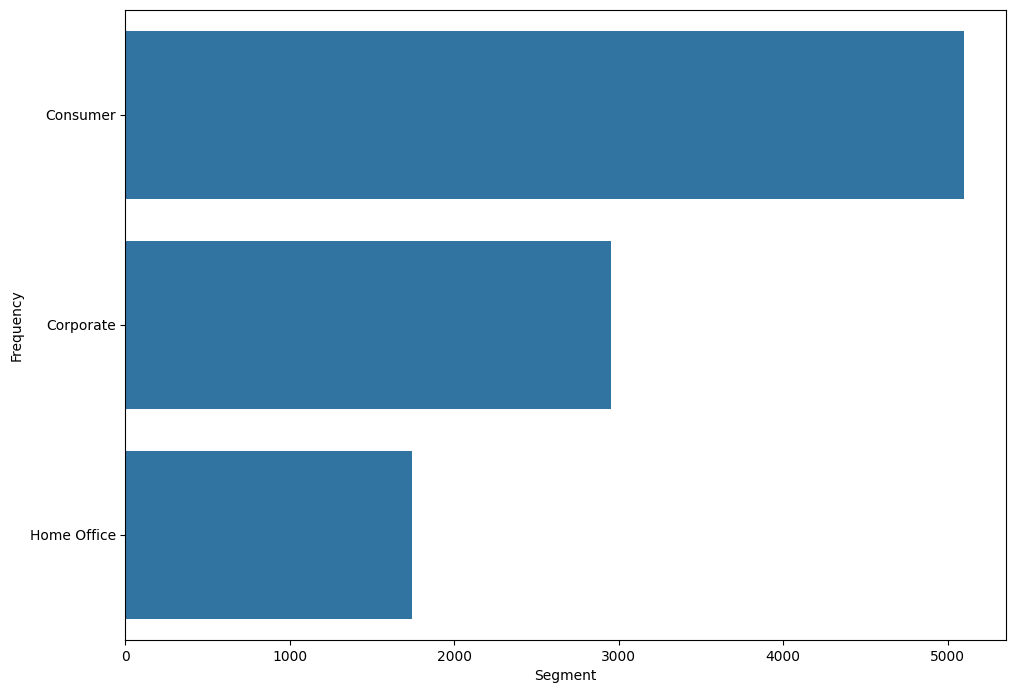

In [30]:
import seaborn as sns
plt.figure(figsize=(25,18))
plt.subplot(2,2,1)
sns.countplot(df['Segment'])
plt.xlabel('Segment')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

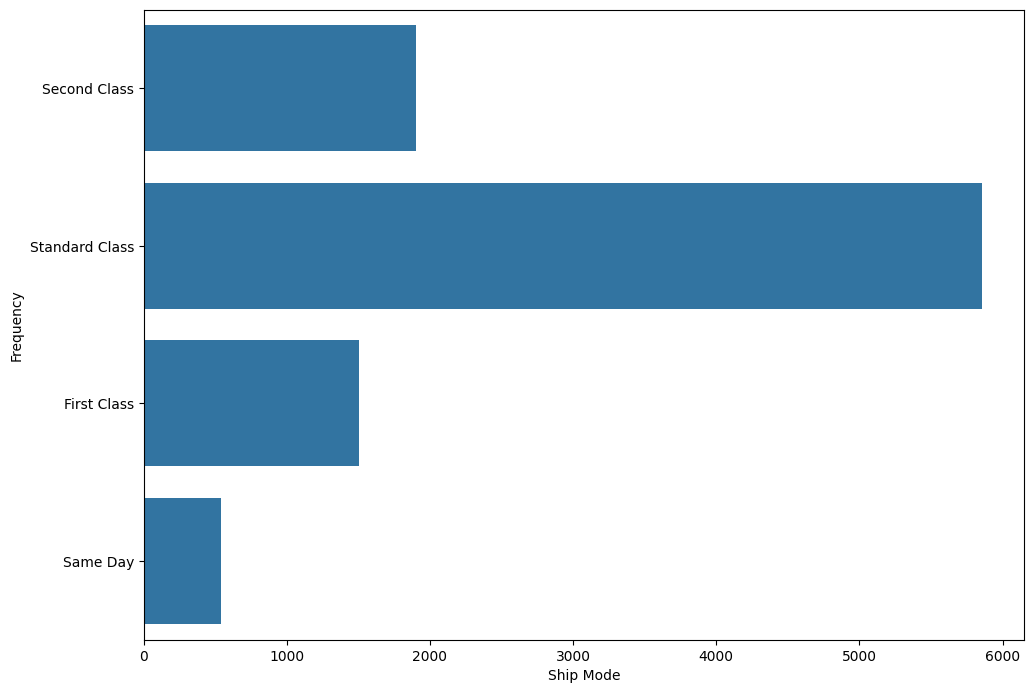

In [31]:
plt.figure(figsize=(25,18))
plt.subplot(2,2,1)
sns.countplot(df['Ship Mode'])
plt.xlabel('Ship Mode')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

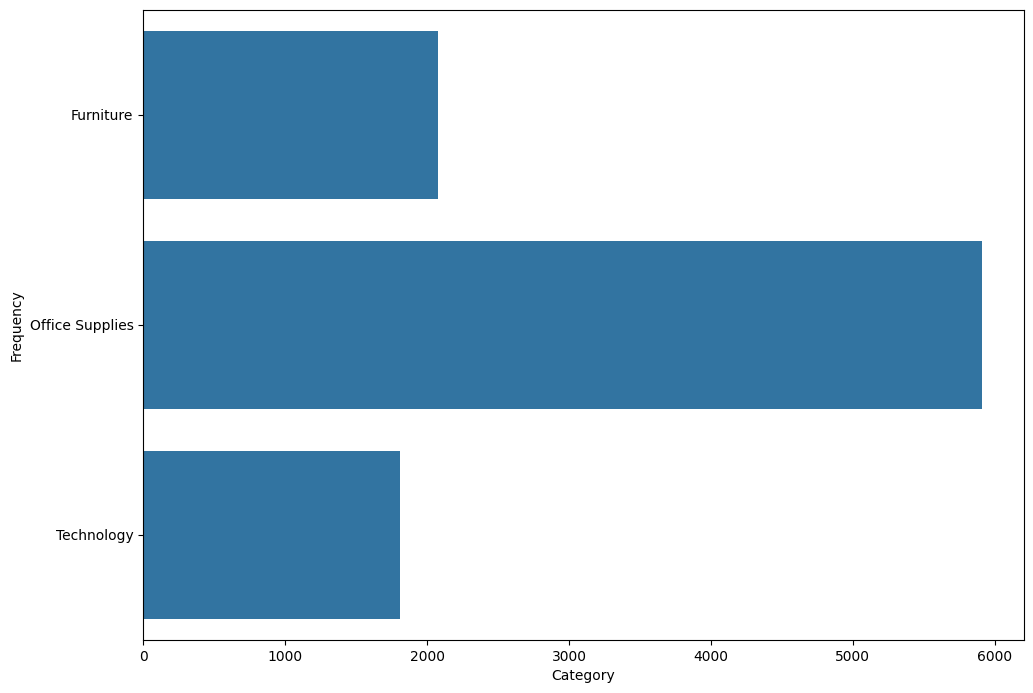

In [32]:
plt.figure(figsize=(25,18))
plt.subplot(2,2,1)
sns.countplot(df['Category'])
plt.xlabel('Category')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

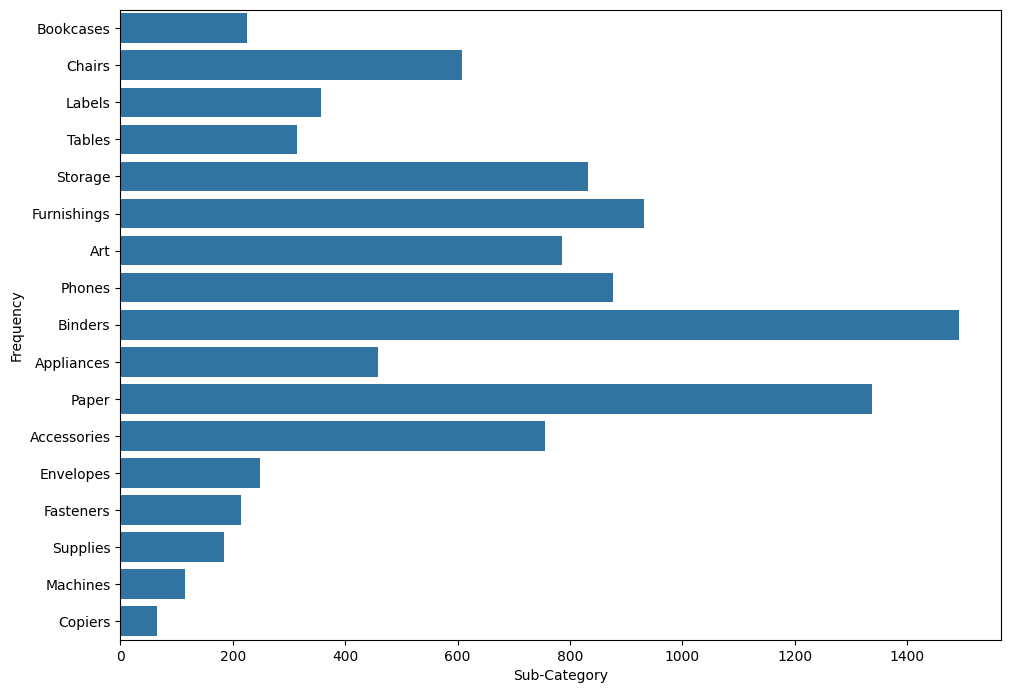

In [33]:
plt.figure(figsize=(25,18))
plt.subplot(2,2,1)
sns.countplot(df['Sub-Category'])
plt.xlabel('Sub-Category')
plt.ylabel('Frequency')

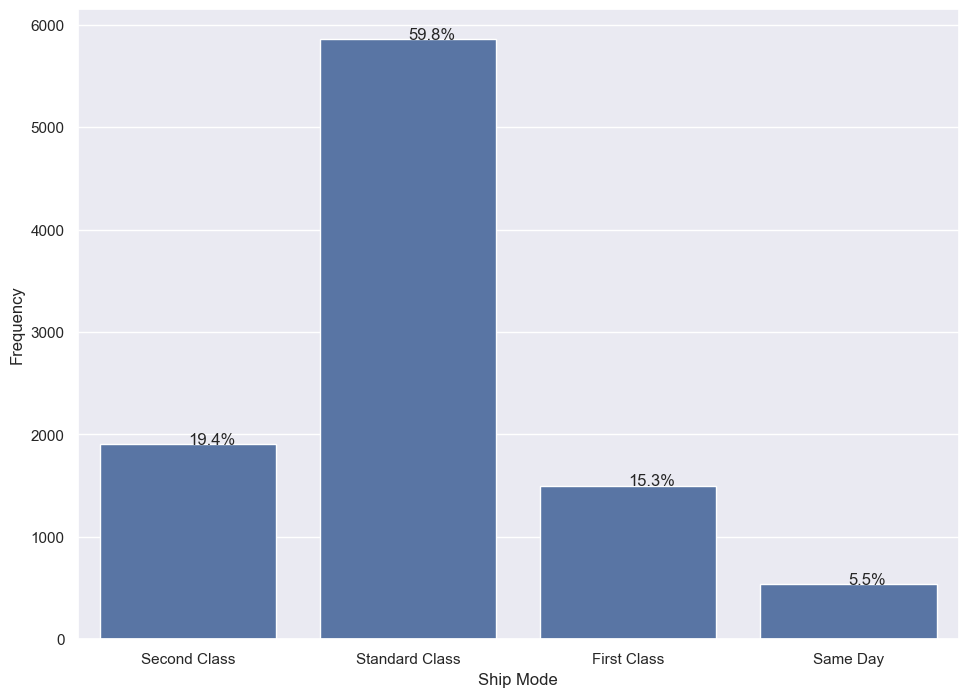

In [34]:
sns.set()
plt.figure(figsize=(25,18))
plt.subplot(2,2,1) #membuat subplot 2x2 pada indeks pertama
ax = sns.countplot(x=df['Ship Mode']) #membuat plot jumlah dari kolom Gender 
plt.xlabel('Ship Mode') #mengeset nama label sumbu x subplot 1
plt.ylabel('Frequency') #mengeset nama label sumbu y subplot 1
#fungsi utk menampilkan angka presentase tiap gender pada countplot
total = len(df['Ship Mode'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width()/2
  y = p.get_y() + p.get_height() + 0.02
  ax.annotate(percentage, (x,y))

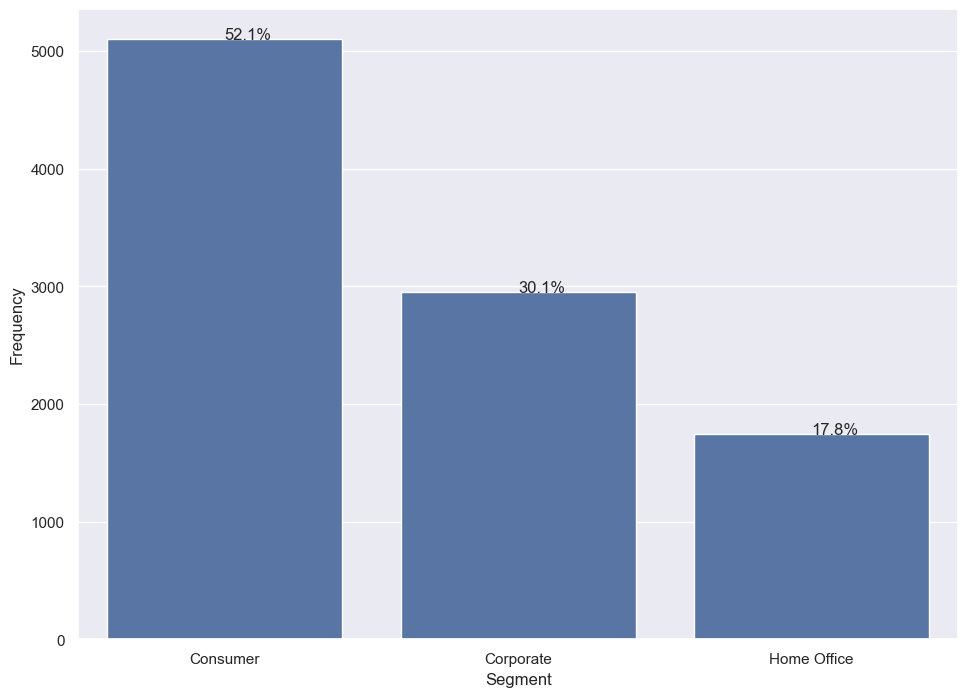

In [35]:
sns.set()
plt.figure(figsize=(25,18))
plt.subplot(2,2,1) #membuat subplot 2x2 pada indeks pertama
ax = sns.countplot(x=df['Segment']) #membuat plot jumlah dari kolom Gender 
plt.xlabel('Segment') #mengeset nama label sumbu x subplot 1
plt.ylabel('Frequency') #mengeset nama label sumbu y subplot 1
#fungsi utk menampilkan angka presentase tiap gender pada countplot
total = len(df['Segment'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width()/2
  y = p.get_y() + p.get_height() + 0.02
  ax.annotate(percentage, (x,y))

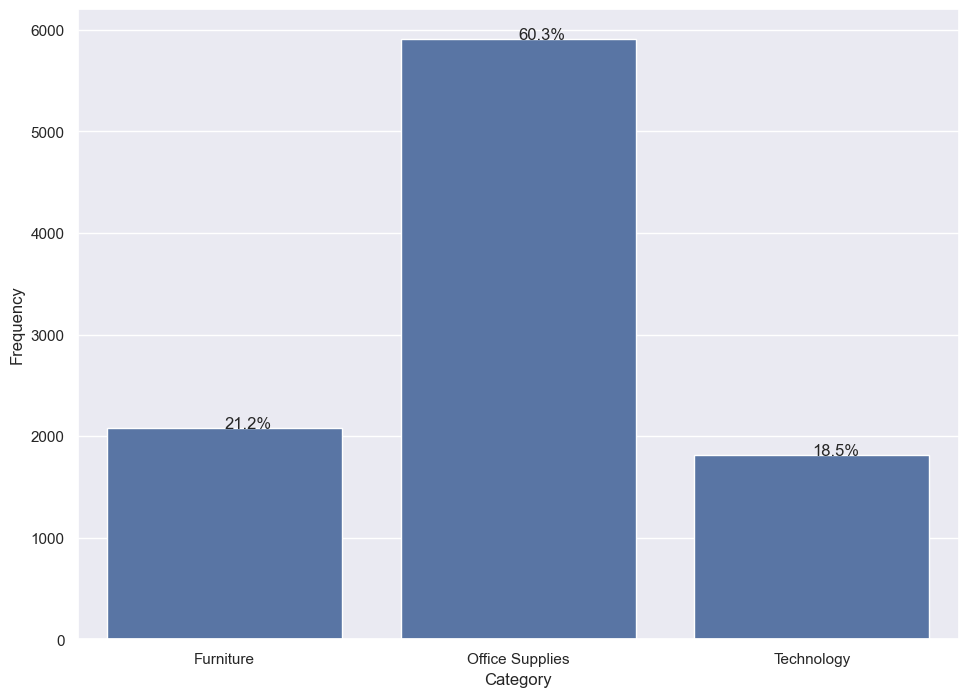

In [36]:
sns.set()
plt.figure(figsize=(25,18))
plt.subplot(2,2,1) #membuat subplot 2x2 pada indeks pertama
ax = sns.countplot(x=df['Category']) #membuat plot jumlah dari kolom Gender 
plt.xlabel('Category') #mengeset nama label sumbu x subplot 1
plt.ylabel('Frequency') #mengeset nama label sumbu y subplot 1
#fungsi utk menampilkan angka presentase tiap gender pada countplot
total = len(df['Category'])
for p in ax.patches:
  percentage = '{:.1f}%'.format(100*p.get_height()/total)
  x = p.get_x() + p.get_width()/2
  y = p.get_y() + p.get_height() + 0.02
  ax.annotate(percentage, (x,y))

<Axes: >

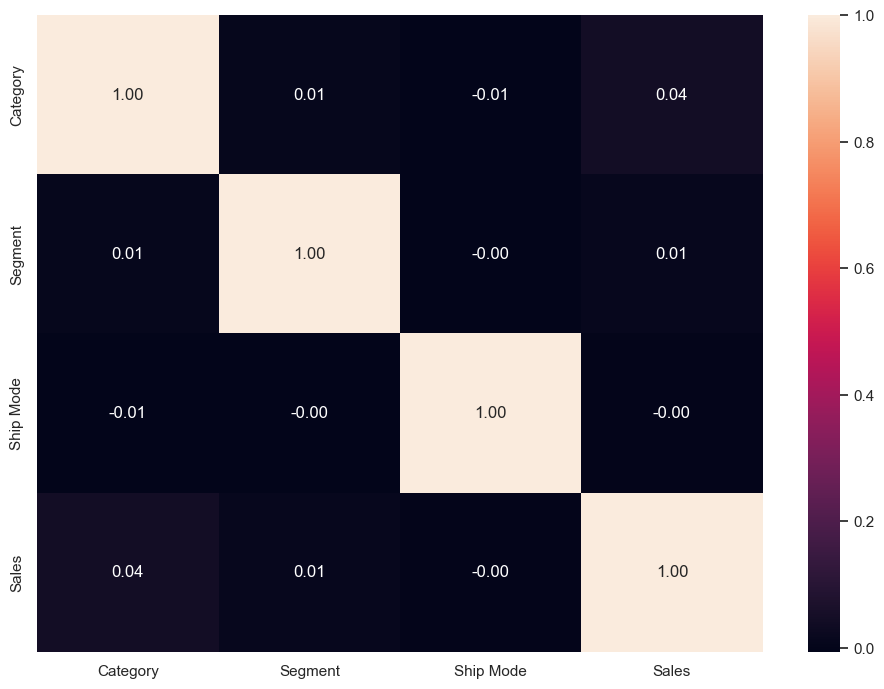

In [37]:
# Heatmap pada Category, Segment, Ship Mode, dan Sales untuk melihat variabel mana yang paling berpengaruh 
# Lakukan Encoding terlebih dahulu karena kolom kolom tersebut bertipe Object 
# Untuk menjaga data asli maka kita cukup mencopy semua data yang dibutuhkan saja
from sklearn.preprocessing import LabelEncoder
laencoder = LabelEncoder()

df_hm = df[['Category','Segment', 'Ship Mode', 'Sales']].copy()

df_hm['Category'] = laencoder.fit_transform(df_hm['Category'])
df_hm['Segment'] = laencoder.fit_transform(df_hm['Segment'])
df_hm['Ship Mode'] = laencoder.fit_transform(df_hm['Ship Mode'])

corr = df_hm.corr()
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(corr, annot= True, fmt='.2f')

> ### Pada percobaan untuk mencari korelasi data antara Sales dengan Kategori, Segmen, dan Ship mode diperoleh hasil heatmap atau correlationnya sangat rendah bahkan tidak mencapai 0.1 sehingga dapat dikatakan semua atribut yang dicoba untuk dilihat korelasinya dengan sales atau penjualan bisa dikatakan tidak ada hubungan sama sekali 

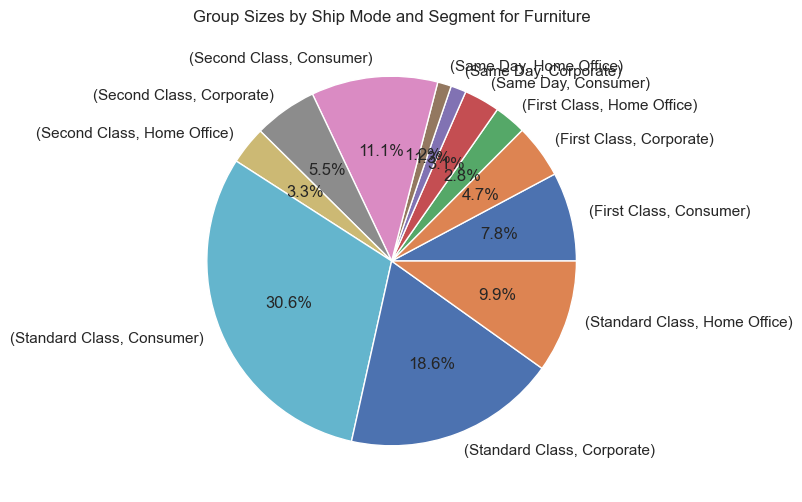

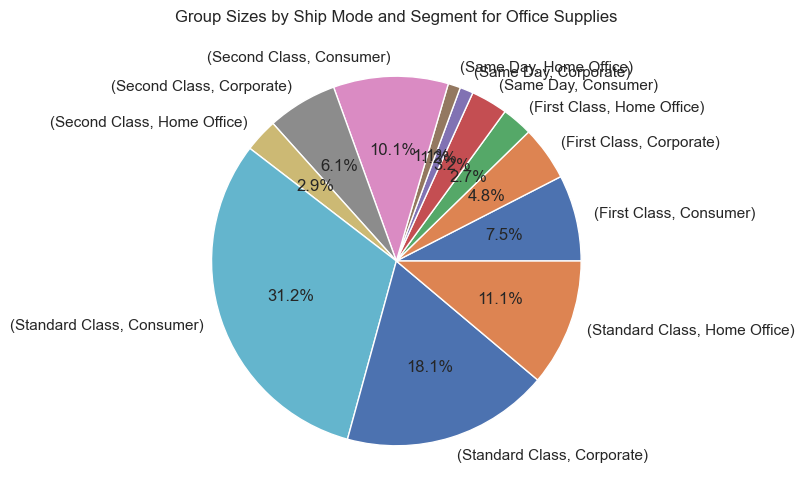

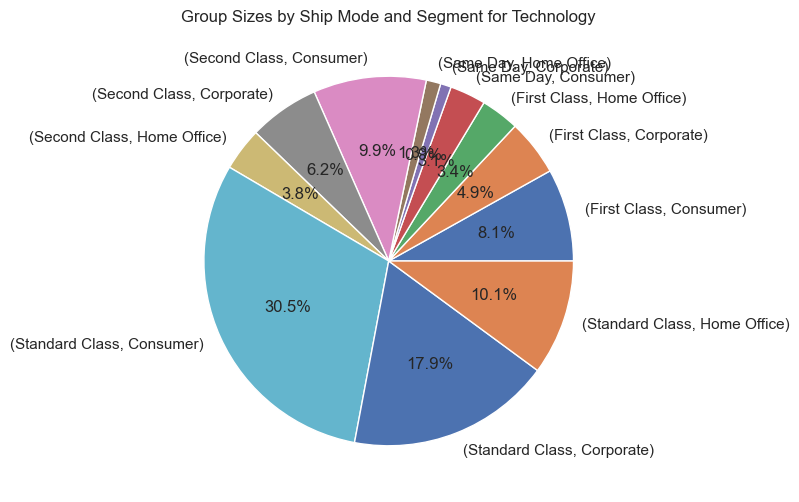

In [38]:
# Group the DataFrame by 'Category', 'Ship Mode', and 'Segment'
df_rel_1 = df.groupby(['Category', 'Ship Mode', 'Segment']).size().reset_index(name='Count')

# Create bar and pie charts for each category
categories = df_rel_1['Category'].unique()

for category in categories:
    df_category = df_rel_1[df_rel_1['Category'] == category]


    # Pie Chart
    plt.figure(figsize=(10, 6))
    df_category.set_index(['Ship Mode', 'Segment'])['Count'].plot(kind='pie', autopct='%1.1f%%', legend=False)
    plt.title(f'Group Sizes by Ship Mode and Segment for {category}')
    plt.ylabel('')  # Hide the y-label
    plt.show()

C:\Users\maizi\AppData\Local\Temp\ipykernel_12628\4063128976.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category['Ship_Segment'] = df_category['Ship Mode'] + ' - ' + df_category['Segment']


<Figure size 1000x600 with 0 Axes>

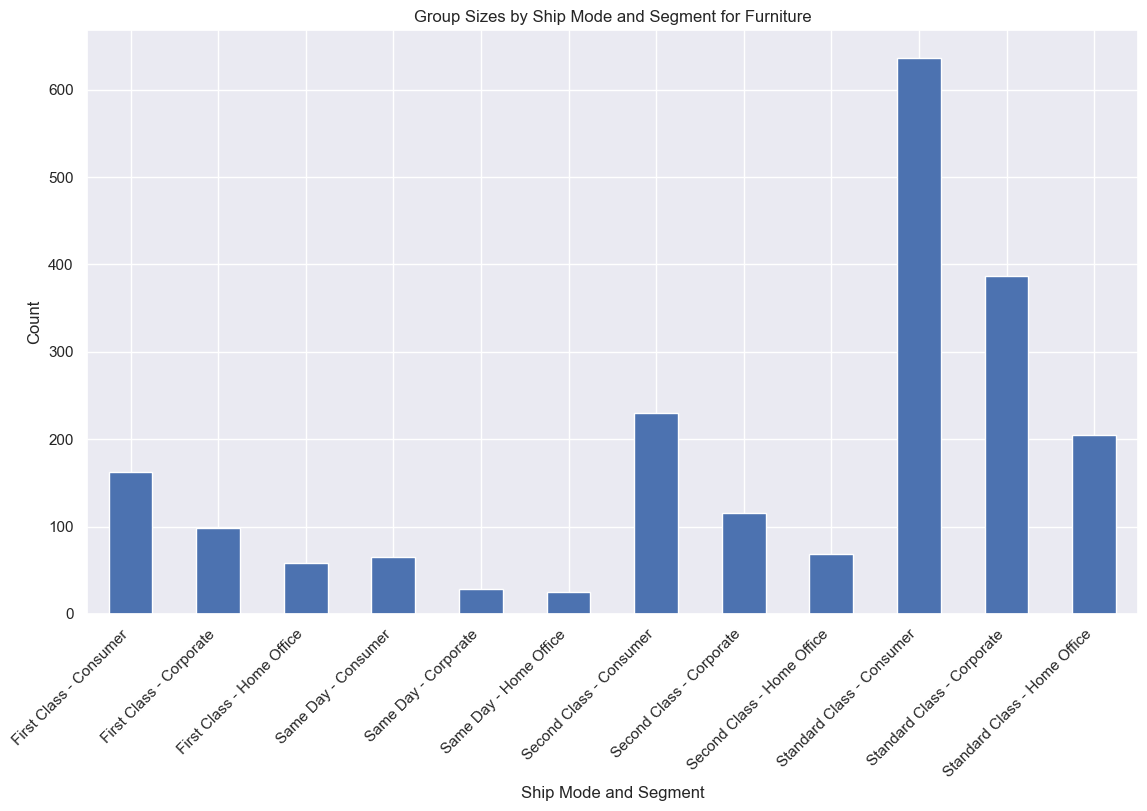

C:\Users\maizi\AppData\Local\Temp\ipykernel_12628\4063128976.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category['Ship_Segment'] = df_category['Ship Mode'] + ' - ' + df_category['Segment']


<Figure size 1000x600 with 0 Axes>

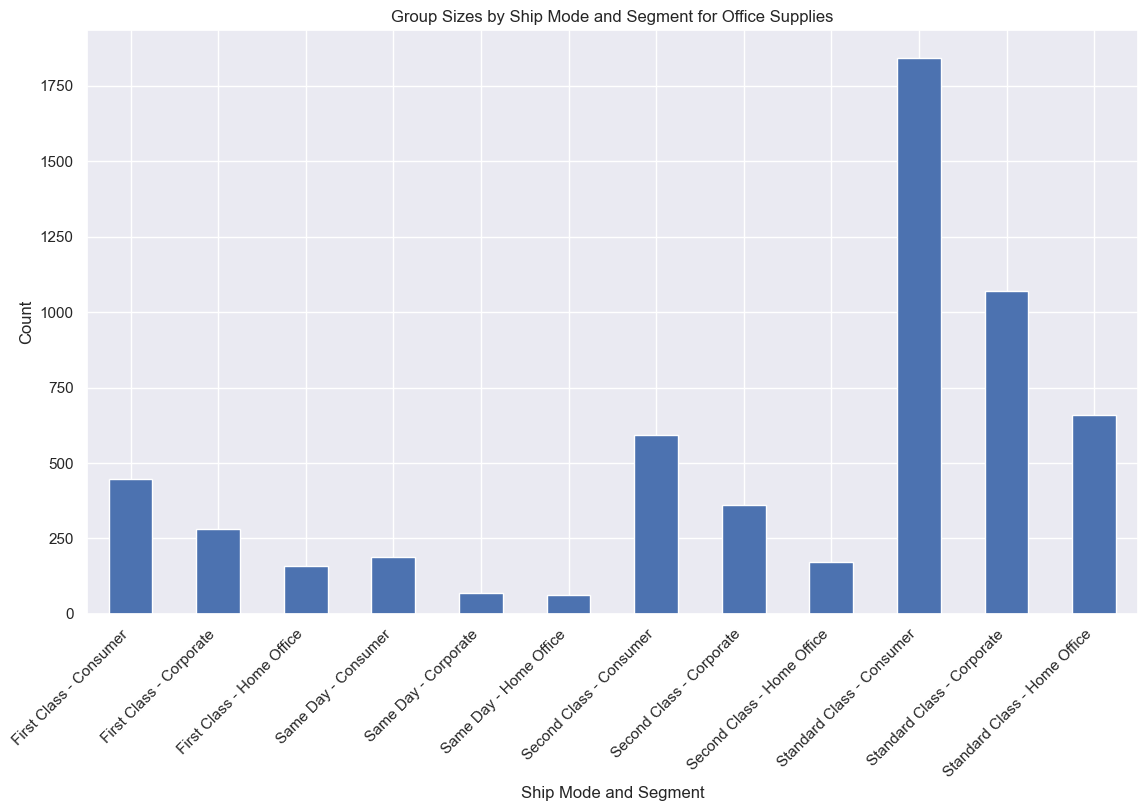

C:\Users\maizi\AppData\Local\Temp\ipykernel_12628\4063128976.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_category['Ship_Segment'] = df_category['Ship Mode'] + ' - ' + df_category['Segment']


<Figure size 1000x600 with 0 Axes>

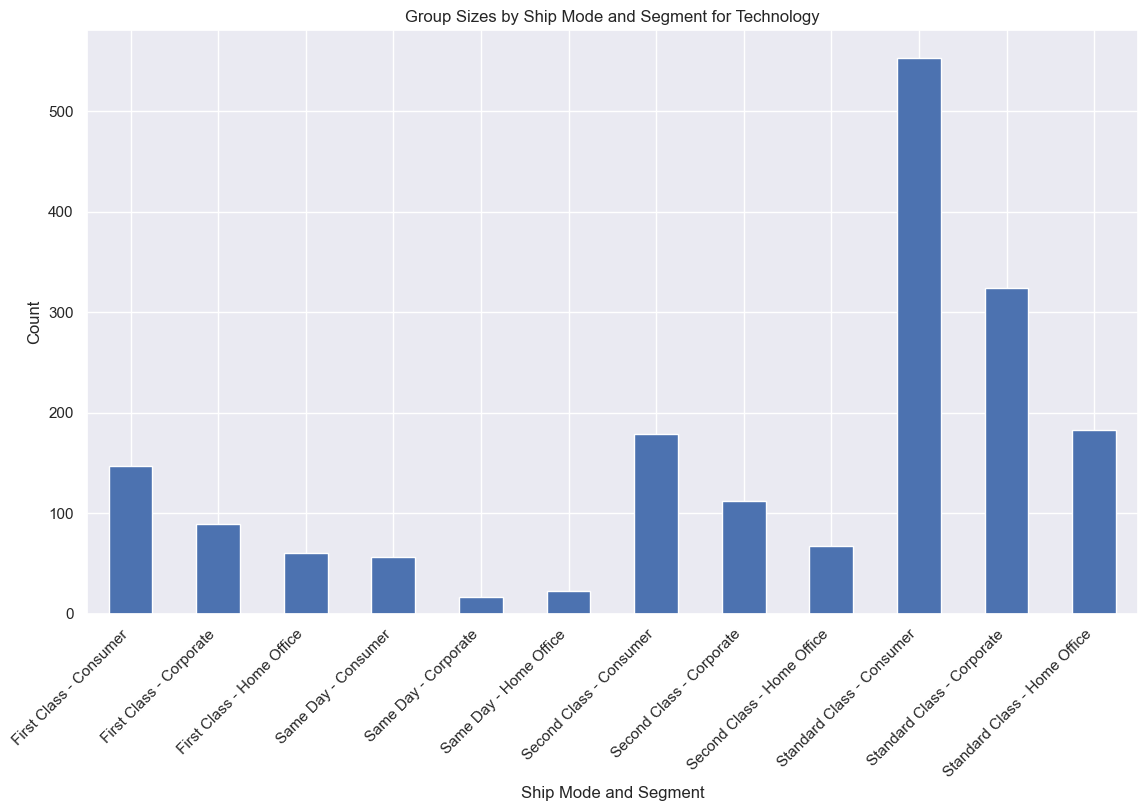

In [39]:

# Group the DataFrame by 'Category', 'Ship Mode', and 'Segment'
df_rel_1 = df.groupby(['Category', 'Ship Mode', 'Segment']).size().reset_index(name='Count')

# Create bar charts for each category
categories = df_rel_1['Category'].unique()

for category in categories:
    df_category = df_rel_1[df_rel_1['Category'] == category]

    # Create a new column combining 'Ship Mode' and 'Segment'
    df_category['Ship_Segment'] = df_category['Ship Mode'] + ' - ' + df_category['Segment']

    # Bar Chart
    plt.figure(figsize=(10, 6))
    df_category.plot(kind='bar', x='Ship_Segment', y='Count', legend=False)
    plt.title(f'Group Sizes by Ship Mode and Segment for {category}')
    plt.xlabel('Ship Mode and Segment')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [40]:
df_rel_2 = df[['Category','Segment', 'Customer ID', 'Customer Name']].groupby(df['Ship Mode'])
# Option 1: Iterate over groups and print them
group_sizes = df_rel_2.size()
print(group_sizes)

Ship Mode
First Class       1501
Same Day           538
Second Class      1902
Standard Class    5859
dtype: int64


>## ***Berdasarkan Informasi yang saya peroleh***
* ### 59.8% Penjualan didominasi oleh Ship Mode dengan tipe Standard Class, 19.4% Second Class, 15.3% First Class, dan 5.5% Same Day
* ### 52.1% Penjualan didomninasi pada segment Consumer, 30.1% pada segment Corporate Segment, dan 17.8 % pada segment Home Office
* ### 60.3% Penjualan didominasi pada kategori Office Supplies, 21.2% kategori Furniture, dan 18.5% kategori Technology

> #### Feature Transformation pada Atribut Date yaitu pada Ship Date dan Order Date

In [41]:
# Feature Transformation 
df["Order Date"] = pd.DatetimeIndex(df['Order Date'])
df["Ship Date"] = pd.DatetimeIndex(df["Ship Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

***Clustering***
---

> ### ***Segmentasi pelanggan berdasarkan Segment pada data pembelian di supermarket***

In [42]:
df['Segment'].value_counts()

Segment
Consumer       5101
Corporate      2953
Home Office    1746
Name: count, dtype: int64

In [43]:
df_cop['Segment'] = laencoder.fit_transform(df_cop['Segment'])

In [44]:
df_seg = df_cop[["Segment", "Sales"]]

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [46]:
df_seg = pd.DataFrame(df_seg)
df_std = scaler.fit_transform(df_seg)
df_std = pd.DataFrame(df_std, columns=df_seg.columns)

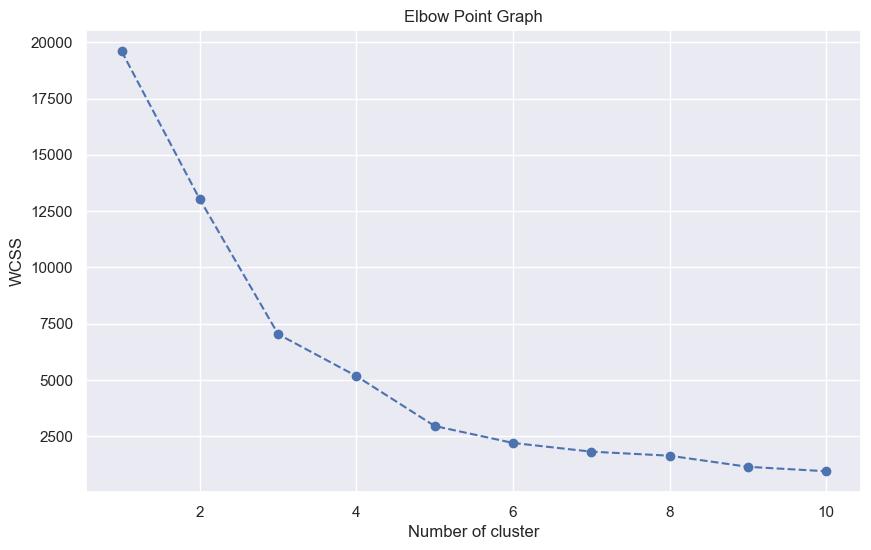

In [47]:
from sklearn.cluster import KMeans

#Menentukan nilai K (jumlah cluster)
wcss = [] #menyimpan nilai Within-Cluster-Sum-of-Squares utk jml cluster 1 hingga 11
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_) #return wcss value for an initialized cluster
  
#Mengeplot grafik nilai wcss  
plt.figure(figsize = (10,6)) #membuat object figure (gambar) dg size 12x9 inch
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--') #mengeplot nilai wcss utk jml cluster 1 hingga 11
plt.xlabel('Number of cluster') #set label sumbu x
plt.ylabel('WCSS') #set label sumbu y
plt.title ('Elbow Point Graph') #set judul plot
plt.show() #menampilkan plot

In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#Menentukan jumlah cluster dengan Silhouette Analysis
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_std)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_std, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6311841873759937)
For n_clusters = 3, silhouette score is 0.6602434943917526)
For n_clusters = 4, silhouette score is 0.7195026125918481)
For n_clusters = 5, silhouette score is 0.7631159511149412)
For n_clusters = 6, silhouette score is 0.7794426666565769)
For n_clusters = 7, silhouette score is 0.7798344227952734)
For n_clusters = 8, silhouette score is 0.7880245602194671)
For n_clusters = 9, silhouette score is 0.784037031717751)
For n_clusters = 10, silhouette score is 0.7822514034241429)
For n_clusters = 11, silhouette score is 0.7590191592097012)


> ### Penentuan n kluster yang optimal berdasarkan metode elbow, dengan bantuan silhouette score dapat dilihat bahwa n kluster yang optimal berada pada n kluster 8 atau 9 karena nilai silhoutte scorenya yang lumayan tinggi dibandingkan dengan n kluster lainnya sehingga n kluster yang dipilih adalah 9

In [86]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_std)

> ### Hasil Visualisasi Klustering Segmentasi Pelanggan berdasarkan Segment pada data pembelian di supermarket

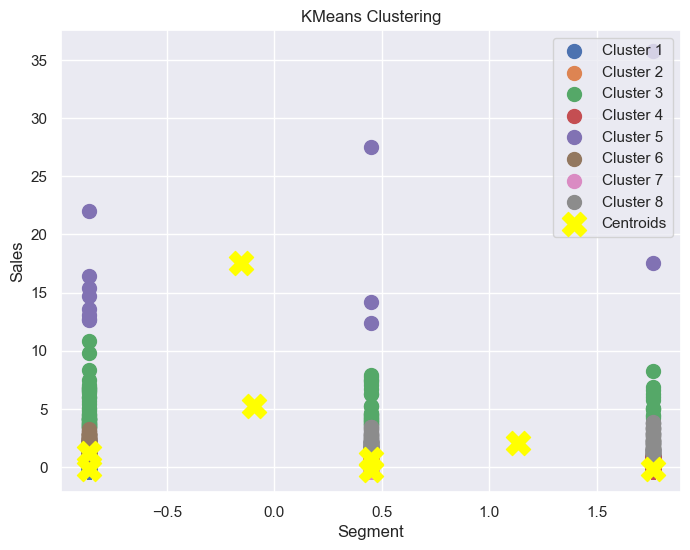

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plotting the clusters
for i in range(8):
    plt.scatter(df_std[y_kmeans == i].iloc[:, 0], df_std[y_kmeans == i].iloc[:, 1], s=100, label=f'Cluster {i+1}')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

# Adding labels and title
plt.title('KMeans Clustering')
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [51]:

df_result = df_std.copy() #menyalin DataFrame df_segm ke DataFrame baru df_segm_result
df_result['Segment K-Means'] = kmeans.labels_ #menambahkan labels tiap data hasil kmeans clustering ke kolom baru 'Segment K-Means' ke Dataframe

df_analysis = df_result.groupby(['Segment K-Means']).mean() #membuat DataFrame baru df_segm_analysis berisi nilai mean dari DataFrame df_segm_result dan mengelompokkannya berdasarkan segmen
df_analysis['Frequency'] = df_result[['Segment K-Means', 'Segment']].groupby(['Segment K-Means']).count() #buat kolom baru 'Frequency' berisi jumlah orang pada Segment tsb dan mengelompokkannya brdsrkan segmen
df_analysis['Percentage'] = df_analysis['Frequency']/df_analysis['Frequency'].sum() #buat kolom baru 'Percentage' berisi nilai presentase jumlah orang pada segment tersebut dibandingkan data keseluruhan 

df_analysis #menampilkan DataFrame df_segm_analysis

,Segment,Sales,Frequency,Percentage
Segment K-Means,,,,
0,-0.862447,-0.213299,4567,0.466020
1,0.448954,0.662786,387,0.039490
2,-0.084756,5.083302,86,0.008776
3,1.760355,-0.161684,1643,0.167653
4,0.448954,28.430889,3,0.000306
5,-0.862447,1.169251,477,0.048673
6,0.448954,-0.249764,2455,0.250510
7,1.135511,2.077220,170,0.017347
8,-0.425313,13.594864,12,0.001224


> ### ***Segmentasi Pelanggan berdasarkan Segment dan Ship Mode pada data Sales***

In [52]:
df_ship = df_cop[['Segment', 'Sales', 'Ship Mode']].copy()
df_ship['Ship Mode'] = laencoder.fit_transform(df_ship['Ship Mode'])

In [53]:
df_std_2 = scaler.fit_transform(df_ship)
df_std_2 = pd.DataFrame(df_std_2, columns=df_ship.columns)

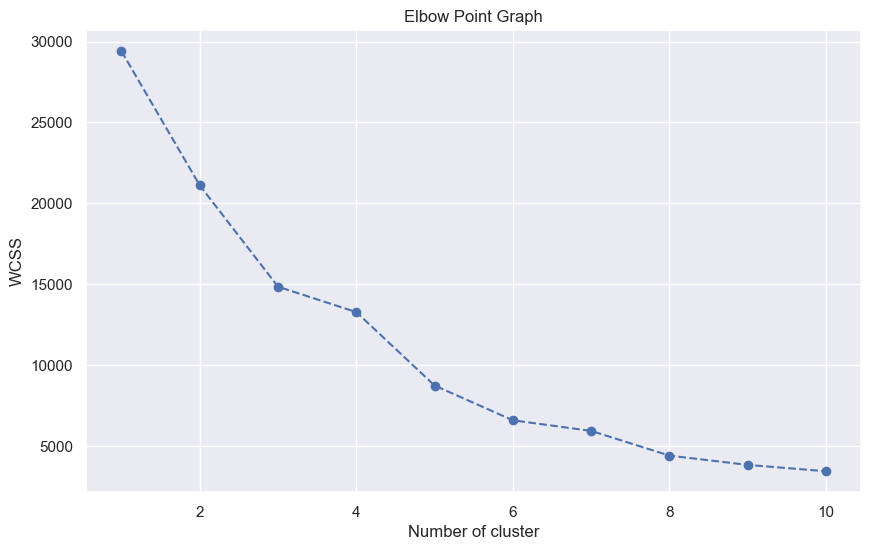

In [54]:
#Menentukan nilai K (jumlah cluster)
wcss = [] #menyimpan nilai Within-Cluster-Sum-of-Squares utk jml cluster 1 hingga 11
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df_std_2)
  wcss.append(kmeans.inertia_) #return wcss value for an initialized cluster
  
#Mengeplot grafik nilai wcss  
plt.figure(figsize = (10,6)) #membuat object figure (gambar) dg size 12x9 inch
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--') #mengeplot nilai wcss utk jml cluster 1 hingga 11
plt.xlabel('Number of cluster') #set label sumbu x
plt.ylabel('WCSS') #set label sumbu y
plt.title ('Elbow Point Graph') #set judul plot
plt.show() #menampilkan plot

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#Menentukan jumlah cluster dengan Silhouette Analysis
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_std_2)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_std_2, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4565031462700957)
For n_clusters = 3, silhouette score is 0.5042378602855379)
For n_clusters = 4, silhouette score is 0.5127062530646181)
For n_clusters = 5, silhouette score is 0.5403140476246339)
For n_clusters = 6, silhouette score is 0.4790136773321153)
For n_clusters = 7, silhouette score is 0.5671430897387214)
For n_clusters = 8, silhouette score is 0.6005501965717146)
For n_clusters = 9, silhouette score is 0.6126077732582915)
For n_clusters = 10, silhouette score is 0.6476713367776571)
For n_clusters = 11, silhouette score is 0.6378529268920852)


> ### Penentuan n kluster yang optimal berdasarkan metode elbow, dengan bantuan silhouette score dapat dilihat bahwa n kluster yang optimal berada pada n kluster 10 karena nilai silhoutte scorenya yang lumayan tinggi dibandingkan dengan n kluster lainnya sehingga n kluster yang dipilih adalah 10

In [84]:
kmeans_2 = KMeans(n_clusters = 10, init = 'k-means++', random_state = 42)
y_kmeans_1 = kmeans_2.fit_predict(df_std_2)

> ### ***Hasil Visualisasi Segmentasi Pelanggan berdasarkan Segment dan Ship Mode pada data Sales***

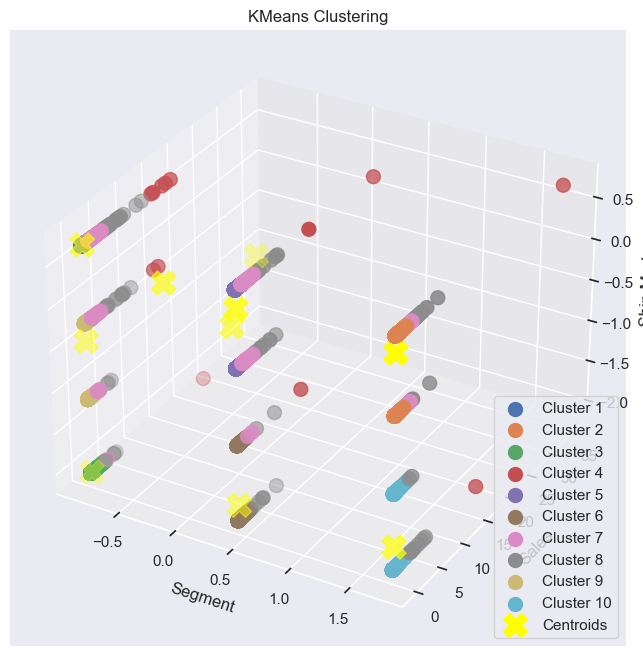

In [85]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
for i in range(10):  # Change range to number of clusters
    ax.scatter(df_std_2[y_kmeans_1 == i].iloc[:, 0], 
               df_std_2[y_kmeans_1 == i].iloc[:, 1], 
               df_std_2[y_kmeans_1 == i].iloc[:, 2], 
               s=100, label=f'Cluster {i+1}')

# Plotting the centroids
centroids = kmeans_2.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           s=300, c='yellow', label='Centroids', marker='X')

# Adding labels and title
ax.set_title('KMeans Clustering')
ax.set_xlabel('Segment')
ax.set_ylabel('Sales')
ax.set_zlabel('Ship Mode')
ax.legend()
ax.grid(True)

plt.show()


In [58]:

df_result = df_std_2.copy() #menyalin DataFrame df_segm ke DataFrame baru df_segm_result
df_result['Segment K-Means'] = kmeans.labels_ #menambahkan labels tiap data hasil kmeans clustering ke kolom baru 'Segment K-Means' ke Dataframe

df_analysis = df_result.groupby(['Segment K-Means']).mean() #membuat DataFrame baru df_segm_analysis berisi nilai mean dari DataFrame df_segm_result dan mengelompokkannya berdasarkan segmen
df_analysis['Frequency'] = df_result[['Segment K-Means', 'Ship Mode']].groupby(['Segment K-Means']).count() #buat kolom baru 'Frequency' berisi jumlah orang pada Segment tsb dan mengelompokkannya brdsrkan segmen
df_analysis['Percentage'] = df_analysis['Frequency']/df_analysis['Frequency'].sum() #buat kolom baru 'Percentage' berisi nilai presentase jumlah orang pada segment tersebut dibandingkan data keseluruhan 

df_analysis #menampilkan DataFrame df_segm_analysis

,Segment,Sales,Ship Mode,Frequency,Percentage
Segment K-Means,,,,,
0,-0.862447,-0.175487,0.694139,2817,0.287449
1,1.760355,-0.113976,0.487163,1318,0.134490
2,-0.862447,-0.093571,-2.033796,748,0.076327
3,-0.156308,17.527305,-0.005332,13,0.001327
4,0.448954,-0.178243,0.470321,2202,0.224694
5,0.448954,-0.066335,-1.862800,569,0.058061
6,-0.248531,1.607629,0.413322,408,0.041633
7,0.186674,4.915191,-0.119912,105,0.010714
8,-0.862447,-0.175185,-0.434081,1242,0.126735


> ### ***Segmentasi Pelanggan Berdasarkan Kategori pada data Sales***

In [59]:
df_cat = df[['Category', 'Sales']]

In [60]:
laencoder = LabelEncoder()
df_cat['Category'] = laencoder.fit_transform(df_cat['Category'])

C:\Users\maizi\AppData\Local\Temp\ipykernel_12628\2452200995.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['Category'] = laencoder.fit_transform(df_cat['Category'])


In [61]:
df_cat.head()

,Category,Sales
0,0,261.9600
1,0,731.9400
2,1,14.6200
3,0,957.5775
4,1,22.3680


In [62]:
df_cat = pd.DataFrame(df_cat)
df_cat_std = scaler.fit_transform(df_cat)
df_cat_std = pd.DataFrame(df_cat_std, columns=df_cat.columns)

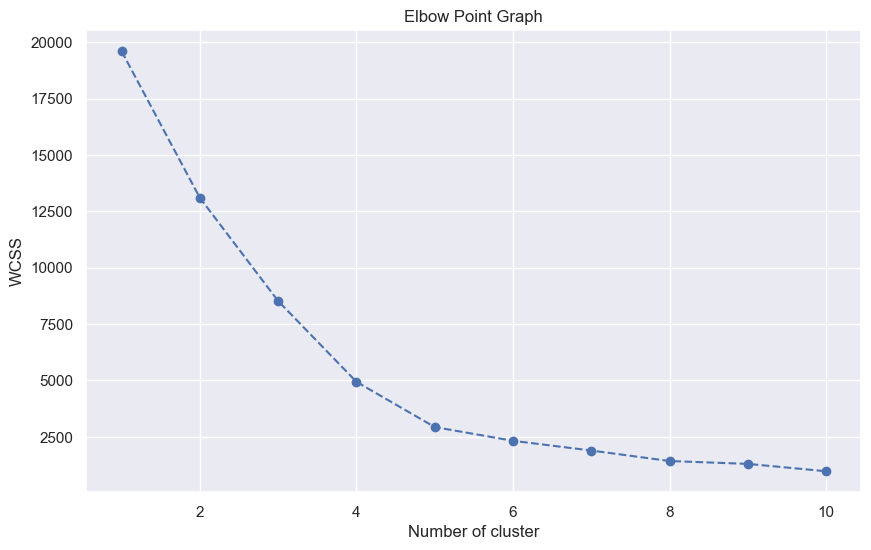

In [63]:
#Menentukan nilai K (jumlah cluster)
wcss = [] # menyimpan nilai Within-Cluster-Sum-of-Squares utk jml cluster 1 hingga 11
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(df_cat_std)
  wcss.append(kmeans.inertia_) #return wcss value for an initialized cluster

#Mengeplot grafik nilai wcss  
plt.figure(figsize = (10,6)) #membuat object figure (gambar) dg size 12x9 inch
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--') #mengeplot nilai wcss utk jml cluster 1 hingga 11
plt.xlabel('Number of cluster') #set label sumbu x
plt.ylabel('WCSS') #set label sumbu y
plt.title ('Elbow Point Graph') #set judul plot
plt.show() #menampilkan plot

In [64]:
from sklearn.metrics import silhouette_samples, silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#Menentukan jumlah cluster dengan Silhouette Analysis
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df_cat_std)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df_cat_std, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6423377144833474)
For n_clusters = 3, silhouette score is 0.7532546214610015)
For n_clusters = 4, silhouette score is 0.7792212831998774)
For n_clusters = 5, silhouette score is 0.8059074413201969)
For n_clusters = 6, silhouette score is 0.8154234892563761)
For n_clusters = 7, silhouette score is 0.8221812303875573)
For n_clusters = 8, silhouette score is 0.8213645404430413)
For n_clusters = 9, silhouette score is 0.8225577602317221)
For n_clusters = 10, silhouette score is 0.798802847480121)
For n_clusters = 11, silhouette score is 0.7918658716616664)


> ### Penentuan n kluster yang optimal berdasarkan metode elbow, dengan bantuan silhouette score dapat dilihat bahwa n kluster yang optimal berada pada n kluster 9 karena nilai silhoutte scorenya yang lumayan tinggi dibandingkan dengan n kluster lainnya sehingga n kluster yang dipilih adalah 9

In [65]:
kmeans_cat = KMeans(n_clusters = 9, init = 'k-means++', random_state = 42)
y_kmeans_cat = kmeans_cat.fit_predict(df_cat_std)

> ### ***Hasil Visualisasi Segmentasi Pelanggan Berdasarkan Kategori pada data Sales***

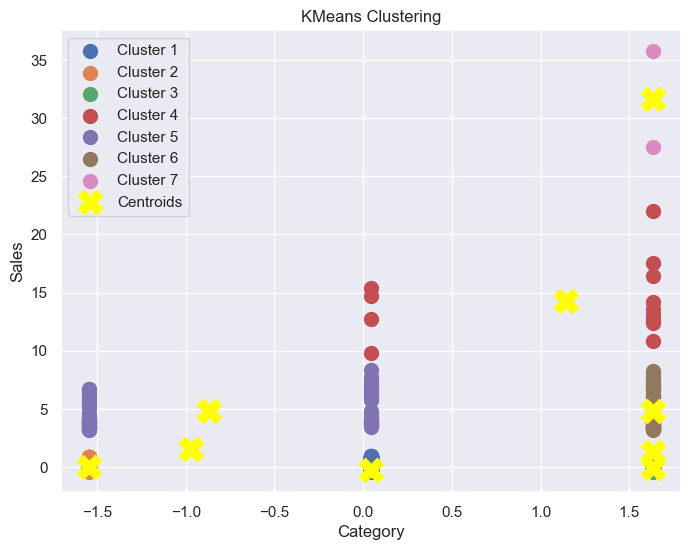

In [66]:
plt.figure(figsize=(8, 6))

# Plotting the clusters
for i in range(7):
    plt.scatter(df_cat_std[y_kmeans_cat == i].iloc[:, 0], df_cat_std[y_kmeans_cat == i].iloc[:, 1], s=100, label=f'Cluster {i+1}')

# Plotting the centroids
centroids = kmeans_cat.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

# Adding labels and title
plt.title('KMeans Clustering')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [67]:

df_result = df_cat_std.copy() #menyalin DataFrame df_segm ke DataFrame baru df_segm_result
df_result['Segment K-Means'] = kmeans_cat.labels_ #menambahkan labels tiap data hasil kmeans clustering ke kolom baru 'Segment K-Means' ke Dataframe

df_analysis = df_result.groupby(['Segment K-Means']).mean() #membuat DataFrame baru df_segm_analysis berisi nilai mean dari DataFrame df_segm_result dan mengelompokkannya berdasarkan segmen
df_analysis['Frequency'] = df_result[['Segment K-Means', 'Category']].groupby(['Segment K-Means']).count() #buat kolom baru 'Frequency' berisi jumlah orang pada Segment tsb dan mengelompokkannya brdsrkan segmen
df_analysis['Percentage'] = df_analysis['Frequency']/df_analysis['Frequency'].sum() #buat kolom baru 'Percentage' berisi nilai presentase jumlah orang pada segment tersebut dibandingkan data keseluruhan 

df_analysis #menampilkan DataFrame df_segm_analysis

,Category,Sales,Frequency,Percentage
Segment K-Means,,,,
0,0.042954,-0.250999,5750,0.586735
1,-1.545530,-0.049024,1815,0.185204
2,1.631437,-0.091945,1473,0.150306
3,1.142673,14.239394,13,0.001327
4,-0.868953,4.784860,54,0.005510
5,1.631437,4.792988,51,0.005204
6,1.631437,31.659457,2,0.000204
7,-0.969486,1.561584,364,0.037143
8,1.631437,1.251754,278,0.028367


In [68]:
df.describe()

,Row ID,Order Date,Ship Date,Sales
count,9800.000000,9800,9800,9800.000000
mean,4900.500000,2017-04-12 14:24:35.265306368,2017-04-21 19:45:12.489796096,230.769059
min,1.000000,2015-01-02 00:00:00,2015-01-04 00:00:00,0.444000
25%,2450.750000,2016-05-02 12:00:00,2016-05-08 00:00:00,17.248000
50%,4900.500000,2017-05-30 00:00:00,2017-06-12 00:00:00,54.490000
75%,7350.250000,2018-04-11 00:00:00,2018-05-02 00:00:00,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-05-01 00:00:00,22638.480000
std,2829.160653,NaN,NaN,626.651875


# Pada describing data terlihat bahwa penjualan rata - rata tahunan adalah 230.769

> ### ***Segmentasi Pelanggan berdasarkan geografis***

C:\Users\maizi\AppData\Local\Temp\ipykernel_12628\1658748666.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order Year', y='Sales', data=sales_per_year, palette='viridis')


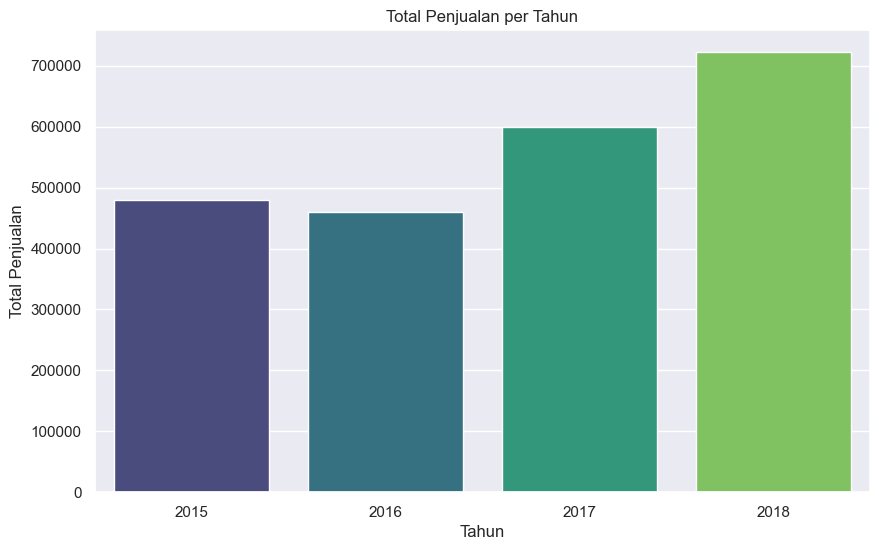

In [69]:
# Konversi kolom tanggal ke format datetime
# df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
# df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

# Ekstraksi tahun dari tanggal order
df['Order Year'] = df['Order Date'].dt.year

# Pengelompokan data berdasarkan tahun order
sales_per_year = df.groupby('Order Year')['Sales'].sum().reset_index()

# Plot penjualan per tahun
plt.figure(figsize=(10, 6))
sns.barplot(x='Order Year', y='Sales', data=sales_per_year, palette='viridis')
plt.title('Total Penjualan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.show()

# Analisis pola geografis
# K-Means clustering berdasarkan data geografis (City dan State)
geo_data = df[['City', 'State', 'Sales']].drop_duplicates()

# Encoding 'City' dan 'State' menjadi numerik untuk clustering
geo_data['City'] = geo_data['City'].astype('category').cat.codes
geo_data['State'] = geo_data['State'].astype('category').cat.codes

In [70]:


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#Menentukan jumlah cluster dengan Silhouette Analysis
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(geo_data)
    centers = clusterer.cluster_centers_

    score = silhouette_score(geo_data, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8978988977831271)
For n_clusters = 3, silhouette score is 0.7580138711160368)
For n_clusters = 4, silhouette score is 0.6907910908692293)
For n_clusters = 5, silhouette score is 0.41458495325429984)
For n_clusters = 6, silhouette score is 0.4087754011923259)
For n_clusters = 7, silhouette score is 0.5182913508796135)
For n_clusters = 8, silhouette score is 0.46086534112670136)
For n_clusters = 9, silhouette score is 0.46871679874844496)
For n_clusters = 10, silhouette score is 0.4552923949507055)
For n_clusters = 11, silhouette score is 0.42723483445281873)


> ### Penentuan n kluster yang optimal berdasarkan metode elbow, dengan bantuan silhouette score dapat dilihat bahwa n kluster yang optimal berada pada n kluster 2 karena nilai silhoutte scorenya yang lumayan tinggi dibandingkan dengan n kluster lainnya sehingga n kluster yang dipilih adalah 2

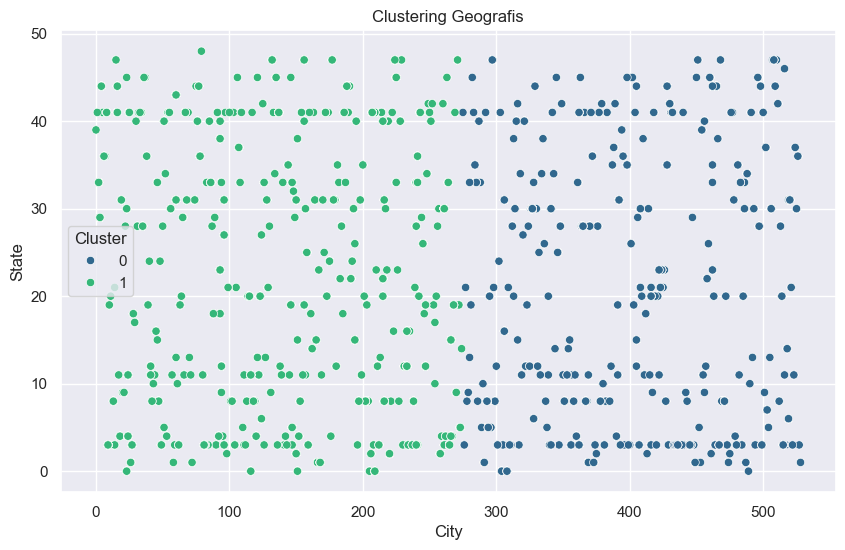

In [71]:
# Clustering dengan K-Means
kmeans = KMeans(n_clusters=2, init = 'k-means++',random_state=42)
geo_data['Cluster'] = kmeans.fit_predict(geo_data[['City', 'State']])

# Plot hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='City', y='State', hue='Cluster', data=geo_data, palette='viridis', legend='full')
plt.title('Clustering Geografis')
plt.xlabel('City')
plt.ylabel('State')
plt.show()

In [72]:

kmeans_ = KMeans(n_clusters=2, init = 'k-means++',random_state=42)
geo_data_cop = geo_data[['City','State']].copy()
kmins_y = kmeans_.fit_predict(geo_data_cop)

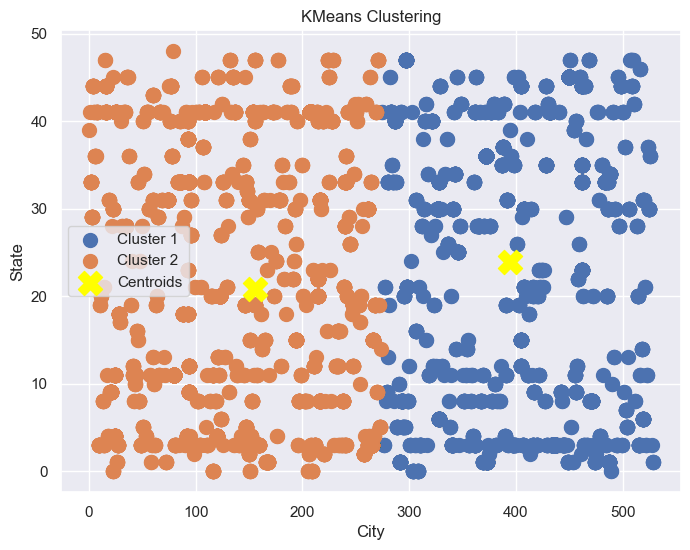

In [73]:
plt.figure(figsize=(8, 6))

# Plotting the clusters
for i in range(2):
    plt.scatter(geo_data_cop[kmins_y == i].iloc[:, 0], geo_data_cop[kmins_y == i].iloc[:, 1], s=100, label=f'Cluster {i+1}')

# Plotting the centroids
centroids = kmeans_.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

# Adding labels and title
plt.title('KMeans Clustering')
plt.xlabel('City')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.show()


In [74]:

df_result = geo_data_cop.copy() #menyalin DataFrame df_segm ke DataFrame baru df_segm_result
df_result['Segment K-Means'] = kmeans_.labels_ #menambahkan labels tiap data hasil kmeans clustering ke kolom baru 'Segment K-Means' ke Dataframe

df_analysis = df_result.groupby(['Segment K-Means']).mean() #membuat DataFrame baru df_segm_analysis berisi nilai mean dari DataFrame df_segm_result dan mengelompokkannya berdasarkan segmen
df_analysis['Frequency'] = df_result[['Segment K-Means', 'City']].groupby(['Segment K-Means']).count() #buat kolom baru 'Frequency' berisi jumlah orang pada Segment tsb dan mengelompokkannya brdsrkan segmen
df_analysis['Percentage'] = df_analysis['Frequency']/df_analysis['Frequency'].sum() #buat kolom baru 'Percentage' berisi nilai presentase jumlah orang pada segment tersebut dibandingkan data keseluruhan 

df_analysis #menampilkan DataFrame df_segm_analysis

,City,State,Frequency,Percentage
Segment K-Means,,,,
0,394.026886,23.907253,4798,0.511896
1,155.123716,20.845027,4575,0.488104


In [77]:
geo_data_cop[geo_data_cop['City'] == 394][['City', 'State']]

,City,State
8149,394,39
8150,394,39


> ### Segmentasi Pelanggan Berdasarkan Frekuensi Pembelian

In [76]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Year
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016


In [83]:
# Melihat berapa banyak pelanggan 
df_wil = df[['Customer ID','Customer Name']].groupby(df['Order ID'])
# Get the size of each group
group_sizes = df_wil.size().reset_index(name='Count')

# Convert to DataFrame and sort by group sizes in ascending order
group_sizes_sorted = group_sizes.sort_values(by='Count', ascending=False)

group_sizes_sorted = pd.DataFrame(group_sizes_sorted)

# Display the sorted DataFrame
group_sizes_sorted


,Order ID,Count
2751,CA-2018-100111,14
3891,CA-2018-157987,12
4448,US-2017-108504,11
2683,CA-2017-165330,11
1185,CA-2016-131338,10
...,...,...
2208,CA-2017-135636,1
2210,CA-2017-135965,1
2212,CA-2017-136049,1
2214,CA-2017-136133,1


<Axes: >

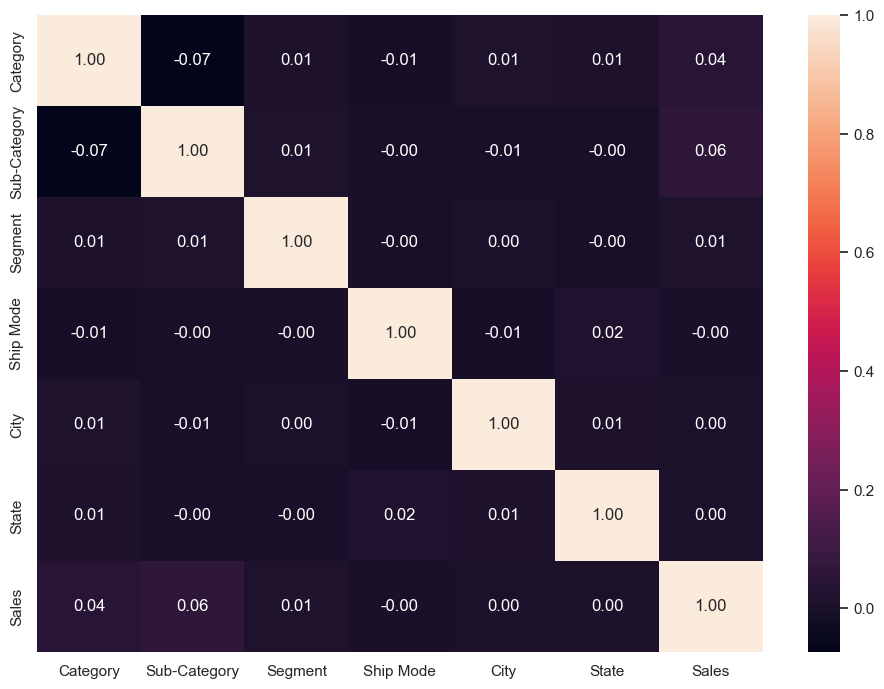

In [91]:
segmen_df = df[['Category', 'Sub-Category','Segment', 'Ship Mode', 'City','State', 'Sales']]
segmen_df_cop = pd.DataFrame(segmen_df)

# Heatmap pada Category, Segment, Ship Mode, dan Sales untuk melihat variabel mana yang paling berpengaruh 
# Lakukan Encoding terlebih dahulu karena kolom kolom tersebut bertipe Object 
# Untuk menjaga data asli maka kita cukup mencopy semua data yang dibutuhkan saja
# laencoder = LabelEncoder()

segmen_df_cop['Category'] = laencoder.fit_transform(segmen_df_cop['Category'])
segmen_df_cop['Segment'] = laencoder.fit_transform(segmen_df_cop['Segment'])
segmen_df_cop['Ship Mode'] = laencoder.fit_transform(segmen_df_cop['Ship Mode'])
segmen_df_cop['Sub-Category'] = laencoder.fit_transform(segmen_df_cop['Sub-Category'])
segmen_df_cop['City'] = laencoder.fit_transform(segmen_df_cop['City'])
segmen_df_cop['State'] = laencoder.fit_transform(segmen_df_cop['State'])

corr = segmen_df_cop.corr()
sns.set(rc={'figure.figsize':(11.7, 8.27)})
sns.heatmap(corr, annot= True, fmt='.2f')



> ### Berdasarkan Heatmap yang diperoleh yang diharapkan dapat menggambarkan indeks korelasi antar variabel yang akan di buatkan menjadi segmentasi atau klustering bahkan dapat dikatakn tidak memiliki hubungan karena indeks yang hanya berkisar dari -0.00 hingga tertinggi 0.06 sehingga dapat dikatakan data yang dihimpun tidak bagus, sehingga akan berdampak pada model klustering yang akan dihasilkan nantinya. 

In [92]:


range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
#Menentukan jumlah cluster dengan Silhouette Analysis
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(segmen_df_cop)
    centers = clusterer.cluster_centers_

    score = silhouette_score(segmen_df_cop, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.8990209121892544)
For n_clusters = 3, silhouette score is 0.7999445066898411)
For n_clusters = 4, silhouette score is 0.693081722427407)
For n_clusters = 5, silhouette score is 0.5640117446185638)
For n_clusters = 6, silhouette score is 0.445070748834463)
For n_clusters = 7, silhouette score is 0.4502100452563885)
For n_clusters = 8, silhouette score is 0.4596266154336119)
For n_clusters = 9, silhouette score is 0.4677664543062024)
For n_clusters = 10, silhouette score is 0.4678647558380377)
For n_clusters = 11, silhouette score is 0.40324912592305706)


In [93]:

kmeans_g = KMeans(n_clusters=2, init = 'k-means++',random_state=42)
kmins_new = kmeans_g.fit_predict(segmen_df_cop)

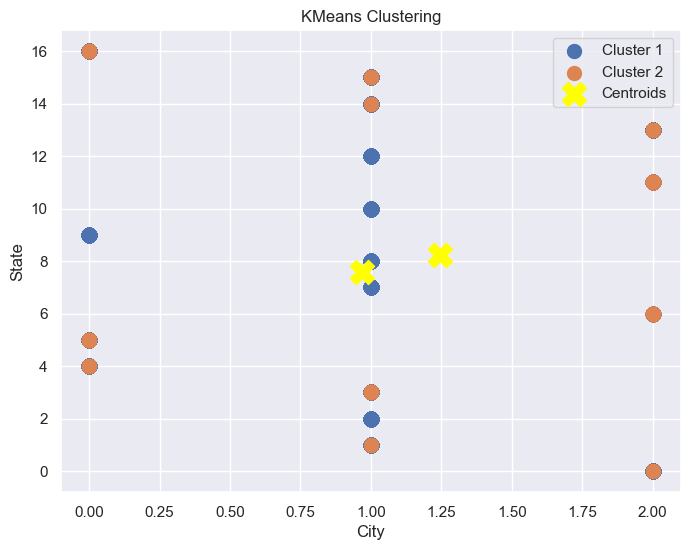

In [98]:
plt.figure(figsize=(8, 6))

# Plotting the clusters
for i in range(2):
    plt.scatter(segmen_df_cop[kmins_new == i].iloc[:, 0], segmen_df_cop[kmins_new == i].iloc[:, 1], s=100, label=f'Cluster {i+1}')

# Plotting the centroids
centroids = kmeans_g.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

# Adding labels and title
plt.title('KMeans Clustering')
plt.xlabel('Sub-Category')
plt.ylabel('State')
plt.legend()
plt.grid(True)
plt.show()


> ### Insight yang dapat diperoleh dari sisi segmentasi pelanggan berdasarkan frekuensi penjualan dengan variabel Region atau berdasarkan daerah, Berdasarkan hasil klustering yang dilakukan pada beberapa attribut pada data supermarket diketahui bahwa kualitas data yang digunakan tidak cukup bagus hal ini dibuktikan dengan adanya tabel hetmap yang mencari dan menunjukkan korelasi antar atrribut terutama attribut yang akan dijadikan sebagai indikator dalam menentukan segmentasi pada proses klustering. Berdasarkan percobaan yang sudah dilakukan dengan menggunakan bantuan nilai sillhouette score untuk menentukan jumlah n cluster yang tepat dan optimal ditambah dengan metode elbow ehingga dapat dilihat bahwa bagian mana yang memang memiliki siku yang baik sebagai indikator n kluster pada diagram elbow yang efektif. 

> #### Berikut hasil dari percobaan klustering dengan K-Means dan metode elbow dengan bantuan nilai sillhouette score yang sudah dilakukan 
>	* Segmentasi Pelanggan berdasarkan Segment pada data pembelian di supermarket memiliki n cluster 9 karena score silhouette score pada n ncluster ini cukup tinggi yaitu 0.7840 atau 78.40%
>	* Segmentasi Pelanggan berdasarkan Segment dan Ship Mode pada data Sales memiliki n cluster 10 karena score silhouette score pada n ncluster ini cukup tinggi yaitu 0.6476 atau 64.76%
>	* Segmentasi Pelanggan Berdasarkan Kategori pada data Sales memiliki n cluster 9 karena score silhouette score pada n ncluster ini cukup tinggi yaitu 0.8225 atau 82.25%
>	* Segmentasi Pelanggan berdasarkan geografis memiliki n cluster 2 karena score silhouette score pada n ncluster ini cukup tinggi yaitu 0.8978 atau 89.78%
>	* Segmentasi Pelanggan Berdasarkan Frekuensi Pembelian memiliki n cluster 2 karena score silhouette score pada n ncluster ini cukup tinggi yaitu 0.8990 atau 89.90%